In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
%pylab inline

# Special packages
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


C:\Users\lcste\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## **Q1. Read the data.**

_Read in the data from http://www.stat.ufl.edu/~winner/data/clinton1.dat. Note that this is NOT a CSV file. The description of the data fields are present in http://www.stat.ufl.edu/~winner/data/clinton1.txt. You will have  to  figure  out  the  rightparameters for thereadcsvcommand yourself (e.g., the regular expressionfor the delimiter, and the names of the columns)._

In [2]:
df = pd.read_table('http://users.stat.ufl.edu/~winner/data/clinton1.dat',
                    header = None,
                    names = ['County_Name',
                            'percentVoting',
                            'Median_Age',
                            'Mean_Savings',
                            'Per_Capita_Income',
                            'Percent_Poverty',
                            'Percent_Veterans',
                            'Percent_Female',
                            'Population_Density',
                            'Percent_Nursing_Homes',
                            'Crime_Index'],
                   sep = '\s{2,}',
                   index_col = 0)

C:\Users\lcste\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [3]:
df[:10]

,percentVoting,Median_Age,Mean_Savings,Per_Capita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_Nursing_Homes,Crime_Index
County_Name,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51


## **Q9. Create  a  classification  target.**

_Attach a new column, called target to the DataFrame, whose value for each row is either 1 (if percentVoting is at least 40.0), or 0 (percentVoting is less than 40.0)_

_Approach: create 'target' in the entire DataFrame intially as 0, and change the values to 1 where percentVoting >= 40.0_

In [4]:
df['target'] = 0
mask = df['percentVoting'] >= 40.0
df['target'][mask] = 1

C:\Users\lcste\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## **Q10. Create  training  and  test  sets.**

_Create design matrices for predicting the target using just the two features poverty and population density. Split this into design matrices for training and testing datasets, with 70% of the data being used for training, and 30% for testing._

_Approach: create a subset of df using .copy() to use dmatrices to create the training and test sets using train-test-split_

In [5]:
df_copy = df[['Percent_Poverty','Population_Density','target']].copy()

y, X = dmatrices('target ~ 0 + Percent_Poverty + Population_Density',
                df_copy, return_type = 'dataframe')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=1)

## **Q11. Accuracy of classification.**

_Use a K-nearest neighbors classifier to predict the target using the two given features, using 1,3,5,10,20,50,100,and 1000 nearest neighbors respectively. Print out the training and test accuracy for each of these._

_Approach: create a list called models in order to loop through each number of nearest neighbors. For every model, print the accuracy on Training and Test data._

In [7]:
from sklearn import neighbors
from sklearn import metrics

models =[]
k = [1,3,5,10,20,50,100,1000]

for i in k:
    model = neighbors.KNeighborsClassifier(n_neighbors = i, weights='uniform', p=2)
    models.append(model)

In [8]:
for m in models:
    m.fit(X_train, y_train)
    prediction_on_training = m.predict(X_train)
    print("Number of nearest neighbors: " + str(m.n_neighbors))
    print( "Training Data Accuracy: " +  str(metrics.accuracy_score(y_train, prediction_on_training)))
    prediction_on_test = m.predict(X_test)
    print( "Test Data Accuracy: " +  str(metrics.accuracy_score(y_test, prediction_on_test)))
    print

C:\Users\lcste\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Number of nearest neighbors: 1
Training Data Accuracy: 0.997885835095
Test Data Accuracy: 0.600985221675

Number of nearest neighbors: 3
Training Data Accuracy: 0.788054968288
Test Data Accuracy: 0.635467980296

Number of nearest neighbors: 5
Training Data Accuracy: 0.748414376321
Test Data Accuracy: 0.630541871921

Number of nearest neighbors: 10
Training Data Accuracy: 0.720401691332
Test Data Accuracy: 0.646551724138

Number of nearest neighbors: 20
Training Data Accuracy: 0.690274841438
Test Data Accuracy: 0.658866995074

Number of nearest neighbors: 50
Training Data Accuracy: 0.683932346723
Test Data Accuracy: 0.662561576355

Number of nearest neighbors: 100
Training Data Accuracy: 0.677589852008
Test Data Accuracy: 0.663793103448

Number of nearest neighbors: 1000
Training Data Accuracy: 0.567124735729
Test Data Accuracy: 0.576354679803



## **Q12. Plots and reasons.**

_Show a scatter plot of population density versus poverty, and color the points according to the target (i.e., each point
in the scatter plot represents a county, and the color of the county depends on the value of target for that county). Can you interpret the plot? What types of counties voted for Bill Clinton?_

_Approach: self-explanatory, zoomed in on scatterplot using xlim to truncate the outliers (for example, 'Kings, NY')_

(0, 5000)

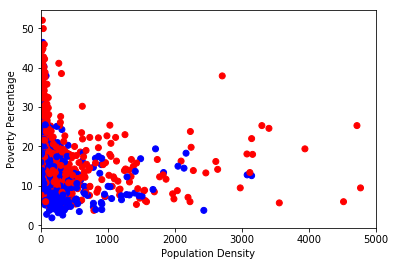

In [11]:
y = y['target'].values
sc = scatter(X['Population_Density'], X['Percent_Poverty'], c=y, cmap='bwr')
xlabel('Population Density')
ylabel('Poverty Percentage')
xlim(0,5000)

As both population density and poverty percentage increase, a county is more likely to have cast more than 40% of their votes for Clinton. Thus, the counties that voted for Clinton had high levels of poverty and were more dense, suggesting that they were urban. At lower levels of population density, counties with a higher poverty percentage favored Clinton. 